# Divinity

This examples demonstrates the use of my timeseries forecasting package, Divinity. 

Timeseries forecasting has applications in staggering array of businesses but is often fraught with danger. Concepts like over-fitting, stationarity and seasonality are alien to the layperson and mishandling any of them can scupper an otherwise perfectly legitimate 30-day forecast.

This package aims to dust all of these necessary timeseries forecasting steps under the carpet by abstracting them into a single python class that aims to automate as much of the process as possible. 

# Synthetic Example

Here we will test on a simple periodic timeseries with a linearly-rising trend and noise simulated from a univariate Gaussian distribution.

In [1]:
#import dependencies
import numpy as np
import divinity as dv
N = 120
Ntrain = 100
t = np.arange(N)
y = 0.1*t + np.sin(2*np.pi/20*t) + np.random.randn(N)*0.5
forecast_length = N - Ntrain

# Divinity Fit

The fitting and forecasting steps should be as simple as possible and we see below that this can be done with just 3 lines of python.

In [2]:
dfc = dv.divinity(forecast_length=forecast_length)
dfc.fit(y[:Ntrain])
y_forecast = dfc.predict()

/Users/david/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


# Examine the Output

We can use matplotlib to plot the predicted vs actual timeseries future

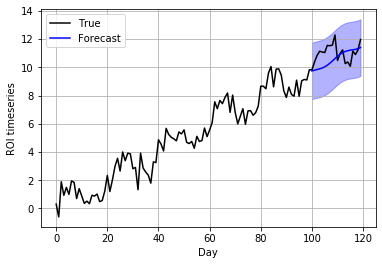

In [3]:
import matplotlib.pylab as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(t, y,label='True',color='k')
ax1.plot(t[Ntrain:],y_forecast,label='Forecast',color='b')
ax1.fill_between(t[Ntrain:], y_forecast - dfc.ystd,
                 y_forecast + dfc.ystd,
                 alpha = 0.3, color='b',label = None)
ax1.set_ylabel('ROI timeseries')
ax1.set_xlabel('Day')
plt.grid(b=None, which='major', axis='both')
plt.legend()

# Extended Forecast

What if, having run my first forecast for 20 days, I now want to perform a long-term (e.g. 50-day) forecast?

In [ ]:
long_term_forecast = dfc.forecast(steps= 50)

# Next steps

The upcoming features to be added to the project are documented in the issues page and project board but are essentially fine tuning the residual-fitting step. Currently after trend and seasonality are taken care of, the residuals are modeled using an ARMA fit. The order of this is currently specified manually but Auto and Partial Auto Correlation Functions can be used to optimise this further. 